<a href="https://colab.research.google.com/github/osetter/ML_course_by_Koroteev/blob/main/ML_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

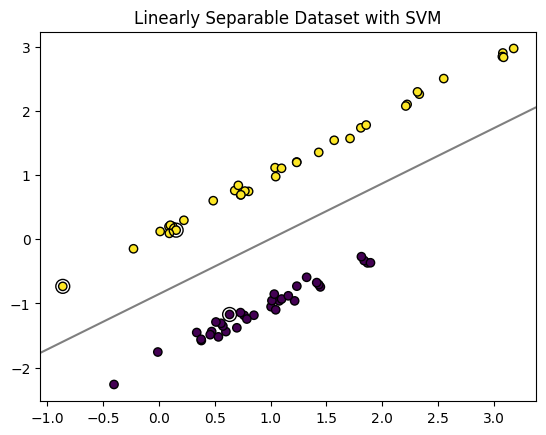

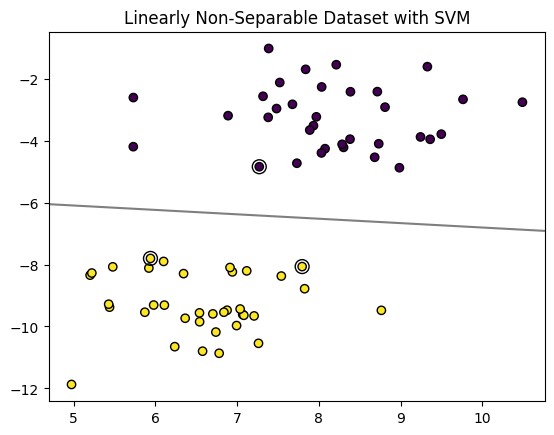

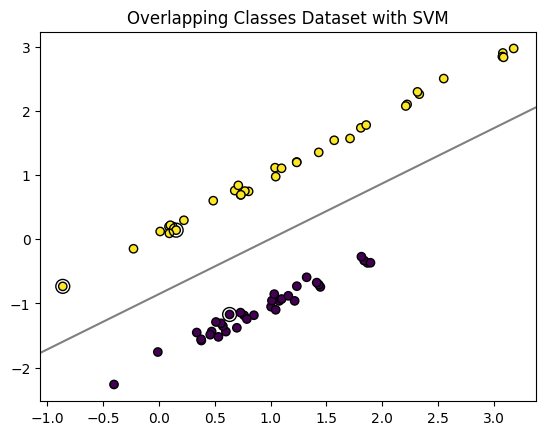

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split


X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = svm.SVC(kernel='linear', C=100)
clf.fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Linearly Separable Dataset with SVM')
plt.show()


X, y = make_blobs(n_samples=100, centers=2, random_state=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = svm.SVC(kernel='linear', C=100)
clf.fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Linearly Non-Separable Dataset with SVM')
plt.show()


X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X[y == 1] += 2

clf = svm.SVC(kernel='linear', C=100)
clf.fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Overlapping Classes Dataset with SVM')
plt.show()

**1) В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. 2. Сделайте вывод о том, как он влияет на модель классификации.**

In [3]:
def experiment_with_C(X, y, C_values):
    for C in C_values:
        clf = svm.SVC(kernel='linear', C=C)
        clf.fit(X, y)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
        plt.title(f'SVM with C={C}')
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
        plt.show()

**2) В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?**

In [4]:
def move_prediction_point(X, y, C=100):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

    new_point = np.array([[2, 2]])  # Переместите новую точку внутрь полосы зазора
    plt.scatter(new_point[:, 0], new_point[:, 1], color='red', marker='x', s=200, label='New Prediction Point')

    decision = clf.decision_function(new_point)
    print(f'Decision function value for the new point: {decision}')

    plt.legend()
    plt.title('Move Prediction Point')
    plt.show()

**3)Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. 5. Сравните вид границы принятия решения и показатели точности модели.**

In [5]:
def kernel_comparison(X, y, kernel_types=['linear', 'poly', 'rbf']):
    for kernel in kernel_types:
        clf = svm.SVC(kernel=kernel, C=1)
        clf.fit(X, y)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

        xlim = plt.gca().get_xlim()
        ylim = plt.gca().get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        plt.title(f'SVM with {kernel} kernel')
        plt.show()

**4)В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.**

In [6]:
def experiment_with_C_overlapping(X, y, C_values):
    for C in C_values:
        clf = svm.SVC(kernel='linear', C=C)
        clf.fit(X, y)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

        xlim = plt.gca().get_xlim()
        ylim = plt.gca().get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        plt.title(f'SVM with C={C}')
        plt.show()

**5)В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.**

In [8]:
from sklearn.svm import LinearSVC


# Задание 5: Применение LinearSVC
def linear_svc_example(X, y):
    clf = LinearSVC(C=1)
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
    plt.scatter(clf.coef_[:, 0], clf.coef_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title('LinearSVC')
    plt.legend()
    plt.show()

**6)Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.**

In [9]:
from sklearn.metrics import accuracy_score

def svm_on_multiattribute_dataset():
    X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_clusters_per_class=1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Подбор параметров
    best_kernel = None
    best_C = None
    best_accuracy = 0

    for kernel in ['linear', 'poly', 'rbf']:
        for C in [0.1, 1, 10, 100]:
            clf = svm.SVC(kernel=kernel, C=C)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_kernel = kernel
                best_C = C

    print(f'Best kernel: {best_kernel}, Best C: {best_C}, Best Accuracy: {best_accuracy}')

    # Применение наилучшей модели
    final_clf = svm.SVC(kernel=best_kernel, C=best_C)
    final_clf.fit(X_train, y_train)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
    plt.scatter(final_clf.support_vectors_[:, 0], final_clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

    plt.title('SVM on Multiattribute Dataset')
    plt.show()

**7) Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?**

In [10]:
def svm_with_large_dataset():
    X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = svm.SVC(kernel='linear', C=1)
    clf.fit(X_train, y_train)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title('SVM with Large Dataset')
    plt.show()

**8)Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.**

In [11]:
def multiclass_classification_example():
    from sklearn.datasets import make_classification
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.svm import SVC

    # Создание визуализируемого датасета
    X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, n_classes=2, random_state=42)
    clf = OneVsRestClassifier(SVC(kernel='linear', C=1))
    clf.fit(X, y)

    # Визуализация границы принятия решения
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=np.arange(len(np.unique(y)))-0.5, alpha=0.5, linestyles=['-'])
    plt.title('Multiclass SVM')
    plt.show()

**9)Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.**

In [12]:
def svm_on_real_dataset():
    from sklearn.datasets import load_iris

    iris = load_iris()
    X, y = iris.data[:, :2], iris.target

    clf = svm.SVC(kernel='linear', C=1)
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')

    # Generate a mesh grid for decision boundary plotting
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title('SVM on Iris Dataset')
    plt.show()

**10)Повторите такой же анализ для задачи регрессии и соответствующего датасета.**

In [13]:
def svm_regression_example():
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error

    # Генерация данных для регрессии
    X = np.sort(5 * np.random.rand(80, 1), axis=0)
    y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

    # Обучение модели
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=3)

    y_rbf = svr_rbf.fit(X, y).predict(X)
    y_lin = svr_lin.fit(X, y).predict(X)
    y_poly = svr_poly.fit(X, y).predict(X)

    # Визуализация результатов
    plt.scatter(X, y, color='black', label='Data')
    plt.plot(X, y_rbf, color='red', label='RBF model')
    plt.plot(X, y_lin, color='green', label='Linear model')
    plt.plot(X, y_poly, color='blue', label='Polynomial model')
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    # Оценка ошибки
    mse_rbf = mean_squared_error(y, y_rbf)
    mse_lin = mean_squared_error(y, y_lin)
    mse_poly = mean_squared_error(y, y_poly)

    print(f'Mean Squared Error (RBF): {mse_rbf}')
    print(f'Mean Squared Error (Linear): {mse_lin}')
    print(f'Mean Squared Error (Polynomial): {mse_poly}')

**Вывод заданий**

Задание 1:


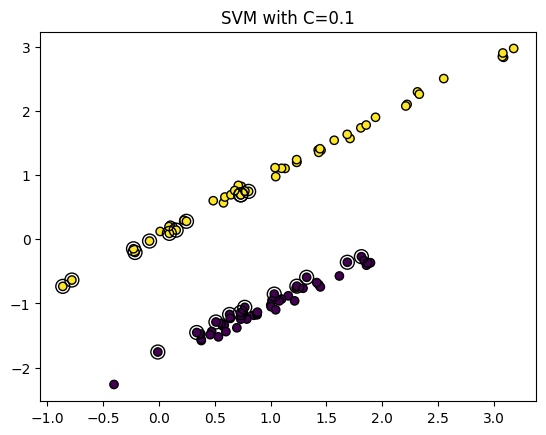

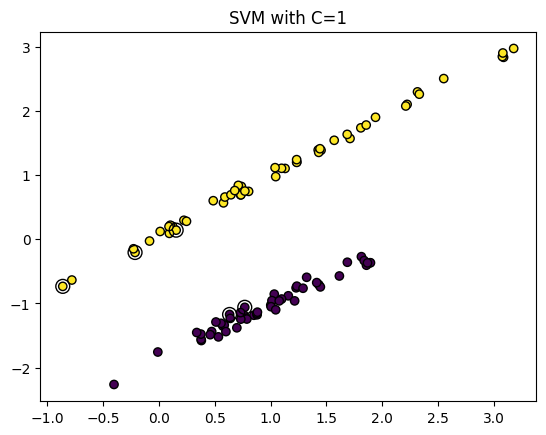

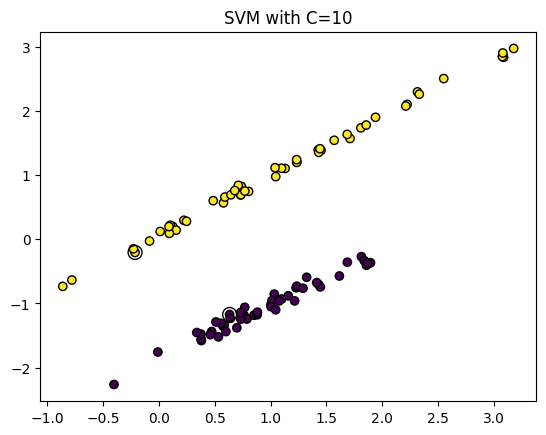

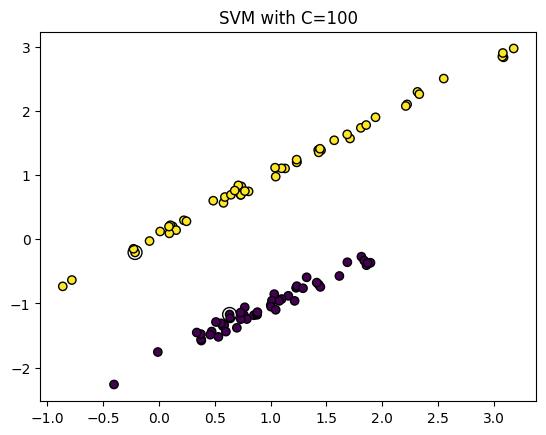

Задание 2:
Decision function value for the new point: [1.31738783]


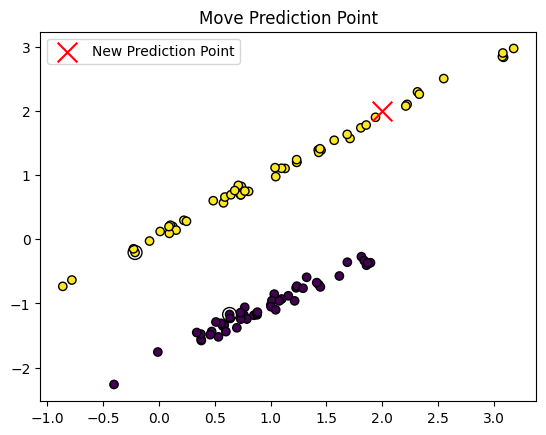

Задание 3:


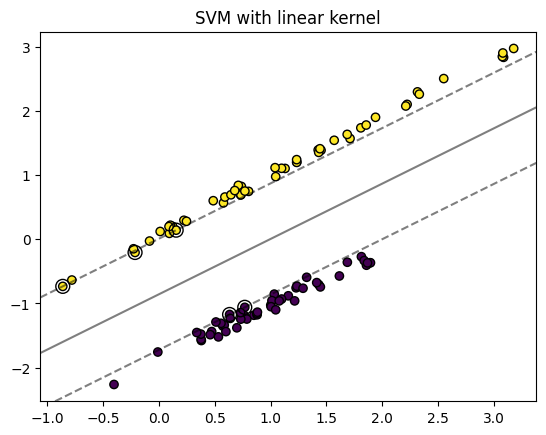

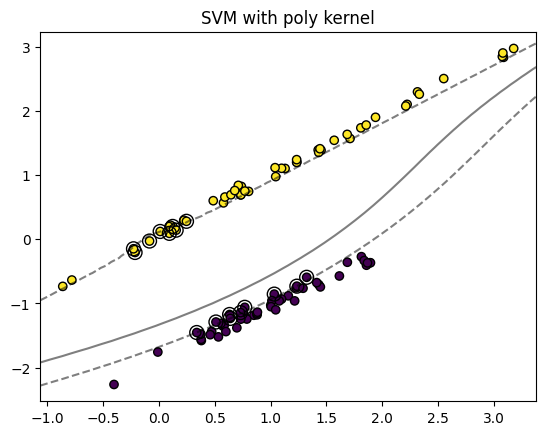

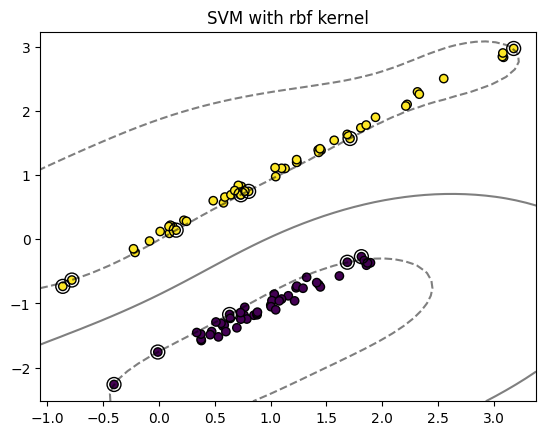

Задание 4:


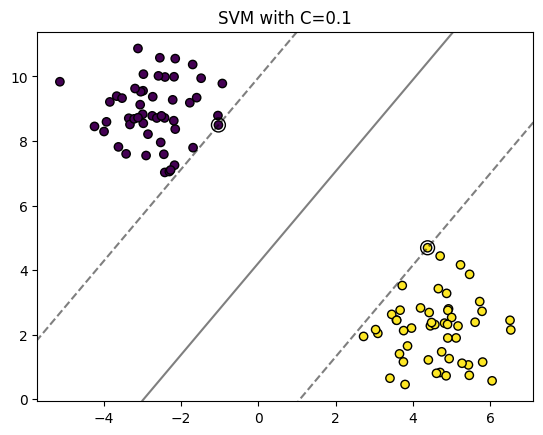

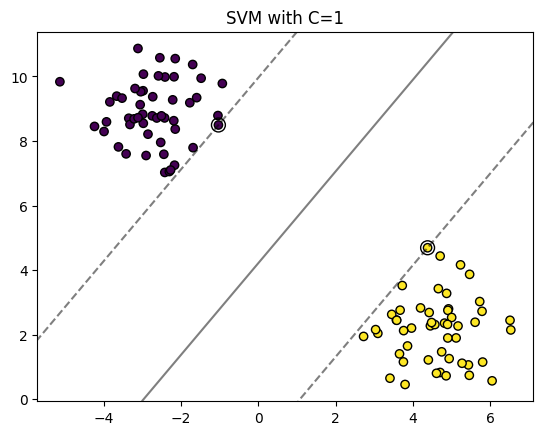

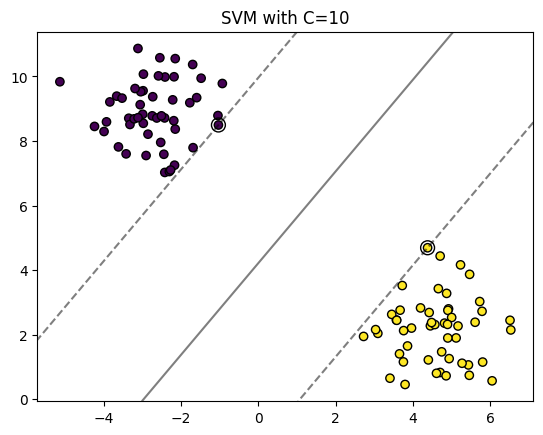

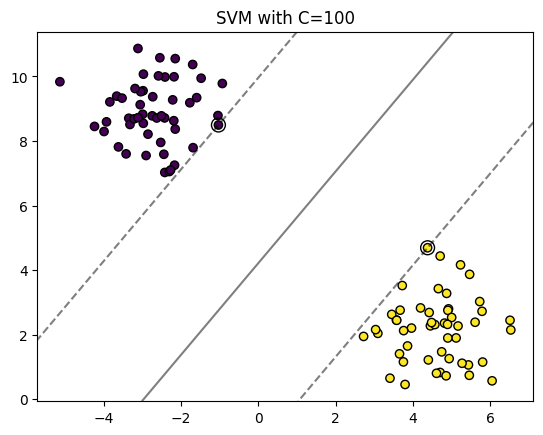

Задание 5:


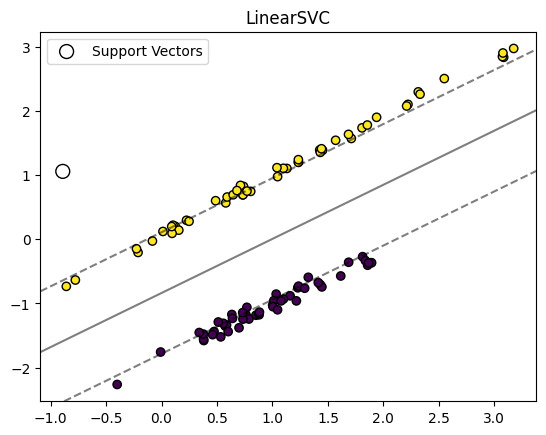

Задание 6:
Best kernel: poly, Best C: 10, Best Accuracy: 0.9933333333333333


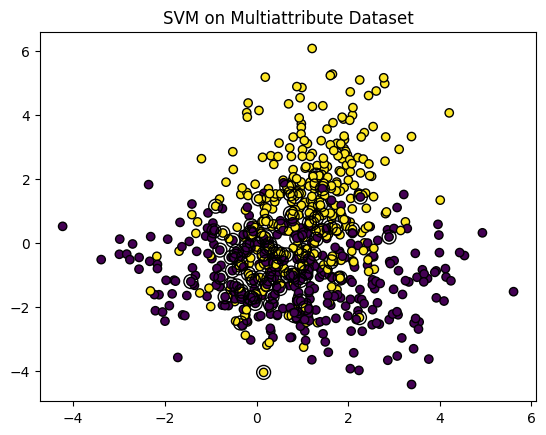

Задание 7:


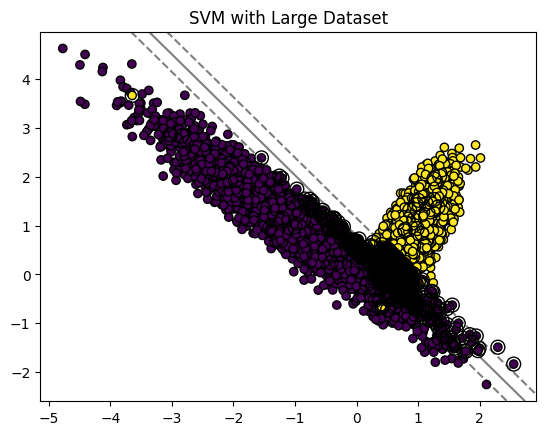

Задание 8:


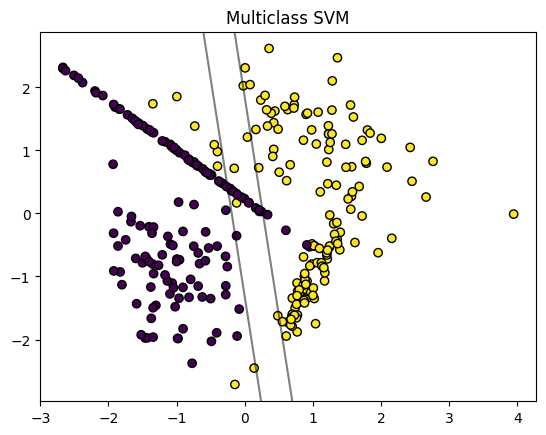

Задание 9:


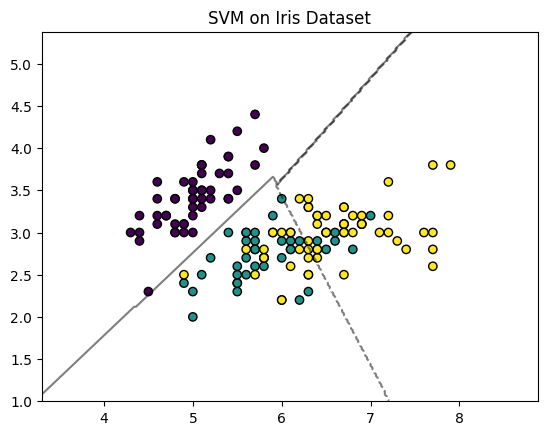

Задание 10:


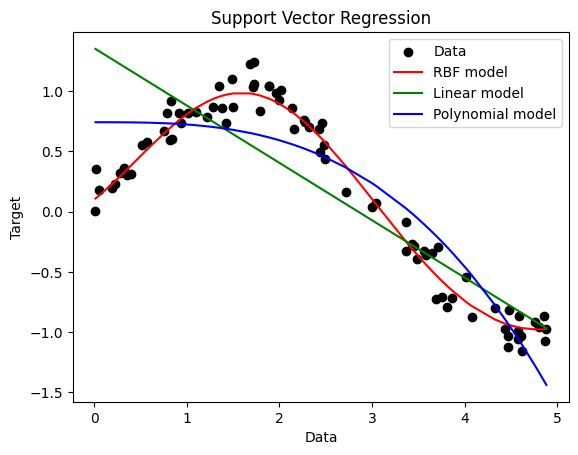

Mean Squared Error (RBF): 0.013344529551690746
Mean Squared Error (Linear): 0.21133657774416745
Mean Squared Error (Polynomial): 0.0961708349562338


In [15]:
# Задание 1: Эксперимент с параметром C
print('Задание 1:')
X1, y1 = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
C_values = [0.1, 1, 10, 100]
experiment_with_C(X1, y1, C_values)

# Задание 2: Подвигайте точку нового предсказания
print('Задание 2:')
X2, y2 = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
move_prediction_point(X2, y2)

# Задание 3: Анализ с разными видами ядер
print('Задание 3:')
kernel_comparison(X2, y2)

# Задание 4: Эксперимент с параметром C для пересекающихся классов
print('Задание 4:')
X4, y4 = make_blobs(n_samples=100, centers=2, random_state=42)
C_values4 = [0.1, 1, 10, 100]
experiment_with_C_overlapping(X4, y4, C_values4)

# Задание 5: Применение LinearSVC
print('Задание 5:')
linear_svc_example(X2, y2)

# Задание 6: Метод опорных векторов на датасете с 5 атрибутами
print('Задание 6:')
svm_on_multiattribute_dataset()

# Задание 7: Метод опорных векторов с большим количеством точек
print('Задание 7:')
svm_with_large_dataset()

# Задание 8: Множественная классификация
print('Задание 8:')
multiclass_classification_example()

# Задание 9: Использование готового датасета для классификации
print('Задание 9:')
svm_on_real_dataset()

# Задание 10: Метод опорных векторов для задачи регрессии
print('Задание 10:')
svm_regression_example()